<a href="https://colab.research.google.com/github/KauaHenSilva/python_facial_detection/blob/main/SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas e setup


In [56]:
from google.colab.drive import mount
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [57]:
# drive: https://drive.google.com/drive/folders/1OXTbhGlG6Y-x6hMY_5Y8Ed3mPB9lP5LF?usp=sharing
mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Detecção de faces com SSD (OpenCV's DNN module)

In [58]:
arquivo_proto_x = "/content/drive/MyDrive/Face Detection and Recognition/weights/deploy.prototxt.txt"
arquivo_modelo = "/content/drive/MyDrive/Face Detection and Recognition/weights/res10_300x300_ssd_iter_140000.caffemodel"
network = cv2.dnn.readNetFromCaffe(arquivo_proto_x, arquivo_modelo)

In [59]:
conf_min = 0.5
imagem = cv2.imread("/content/drive/MyDrive/Face Detection and Recognition/images/people2.jpg")
(h, w) = imagem.shape[:2]
(h, w)

(500, 600)

In [60]:
blob = cv2.dnn.blobFromImage(cv2.resize(imagem, (300, 300)), 1.0, (300, 300), (104, 117, 123))
blob.shape

(1, 3, 300, 300)

In [61]:
network.setInput(blob)
deteccoes = network.forward()
deteccoes

array([[[[0.        , 1.        , 0.992859  , ..., 0.32314938,
          0.21799976, 0.49103862],
         [0.        , 1.        , 0.98039204, ..., 0.27672005,
          0.7734714 , 0.45650136],
         [0.        , 1.        , 0.9799896 , ..., 0.2360353 ,
          0.4807456 , 0.40790528],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [62]:
def show_deteccoes(detc, img, conf):
  for i in range(0, detc.shape[2]):
    confianca_atual = detc[0, 0, i, 2]
    if confianca_atual >= conf:
      text_conf = f"{(confianca_atual * 100):.2f}%"
      box = detc[0, 0, i, 3:7] * np.array([w, h, w, h])
      (start_x, start_y, end_x, end_y) = box.astype(int)
      cv2.rectangle(img, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
      cv2.putText(img, text_conf, (start_x, start_y - 10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.5, (0, 255, 0), 1)
  cv2_imshow(img)

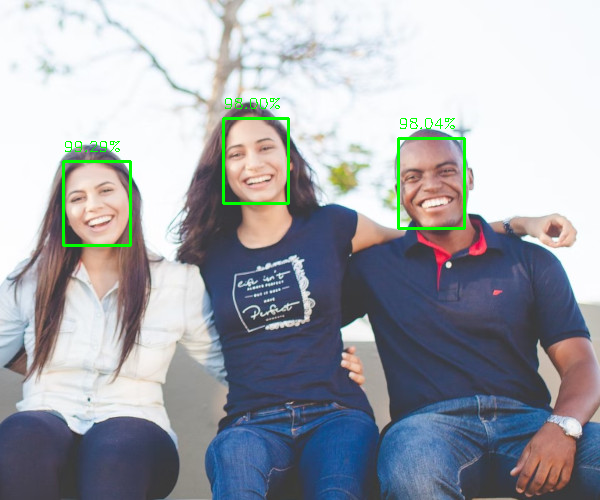

In [63]:
show_deteccoes(deteccoes, imagem, conf_min)